In [45]:
import pandas as pd

colors = ['#99C3B1', '#6EB8D0', '#FF7481', '#FFF0A8', '#B5CCD4']
all_data_df = pd.read_csv('./feb-week-2/all_cat.csv')

groupped_df = all_data_df.groupby('cat')
cat_df = pd.DataFrame()

cat_df['sum_payouts'] = groupped_df['total_payout_value'].sum()
cat_df['mean_pay'] = groupped_df['total_payout_value'].mean()
cat_df['median_pay'] = groupped_df['total_payout_value'].median()
cat_df['posts_count'] = groupped_df['permlink'].count()
cat_df['authors_count'] = groupped_df['author'].nunique()

cat_df = cat_df.add_suffix('_cat').reset_index()
print(cat_df)

                  cat  sum_payouts_cat  mean_pay_cat  median_pay_cat  \
0          Golosmedia        12960.001    254.117667        116.8280   
1                 PSK       263321.602   1687.958987       1898.1280   
2          Vox Populi        62148.759    189.477924         59.0735   
3         Апвот 50-50       187256.272    203.539426          0.0310   
4  Независимые авторы       174347.768     28.741802          0.0000   

   posts_count_cat  authors_count_cat  
0               51                  6  
1              156                 65  
2              328                 38  
3              920                181  
4             6066               1458  


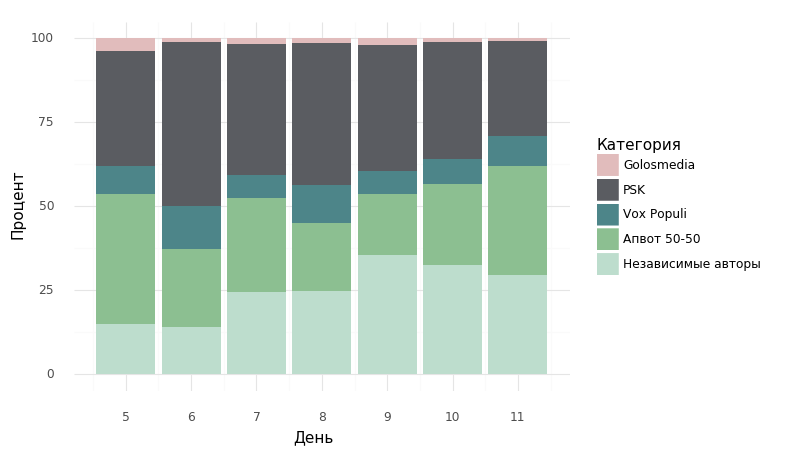

<ggplot: (-9223372036842100620)>

In [49]:
%matplotlib inline
from plotnine import *

(ggplot() + geom_bar(aes(y = 'percent', x = 'day', fill = 'cat'), data = all_data_df, stat="identity") +
     scale_fill_manual(['#E1BCBC', '#5A5C61', '#4D8589', '#8CBF91', '#BDDDCD']) +
     scale_x_continuous(breaks=all_data_df['day'].unique())+
    xlab('День') + ylab('Процент') + ggtitle('') + labs(fill='Категория') + theme_minimal())


<IPython.core.display.Javascript object>


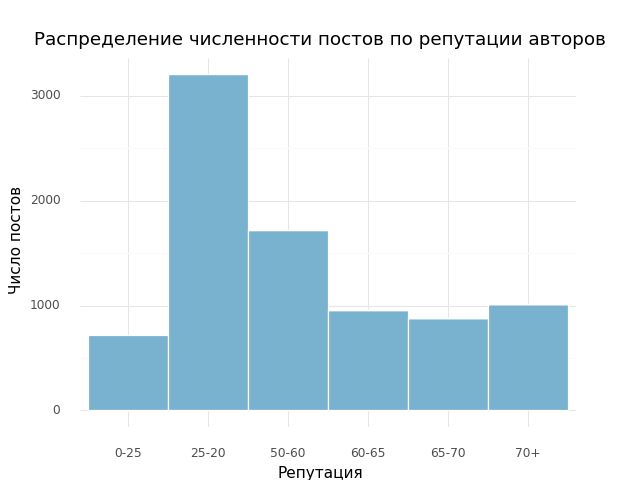

<ggplot: (-9223372036840955118)>

In [35]:
rep_groups_df = all_data_df.groupby('rep_group').describe()

(ggplot(all_data_df) + 
    aes(x='rep_group') +
    geom_histogram(binwidth=1,  fill="#79B2CE", colour='white') + theme_minimal() +
    xlab('Репутация') + ylab('Число постов') + ggtitle('Распределение численности постов по репутации авторов'))


  rep_group   count        mean          std  min       25%      50%  \
0      0-25   715.0    0.000164     0.002326  0.0   0.00000   0.0000   
1     25-20  3205.0    0.050289     0.582678  0.0   0.00000   0.0000   
2     50-60  1718.0    7.728567   149.457406  0.0   0.00000   0.0000   
3     60-65   962.0   43.930202   357.625760  0.0   0.00000   0.0720   
4     65-70   879.0  261.066889   959.031127  0.0   0.00000   0.0990   
5       70+  1016.0  863.143955  1677.412159  0.0  11.85125  67.9365   

         75%       max  
0    0.00000     0.044  
1    0.00000    23.040  
2    0.06400  5087.895  
3    0.90875  4465.104  
4    3.85250  5940.583  
5  275.08775  8154.366  


<IPython.core.display.Javascript object>


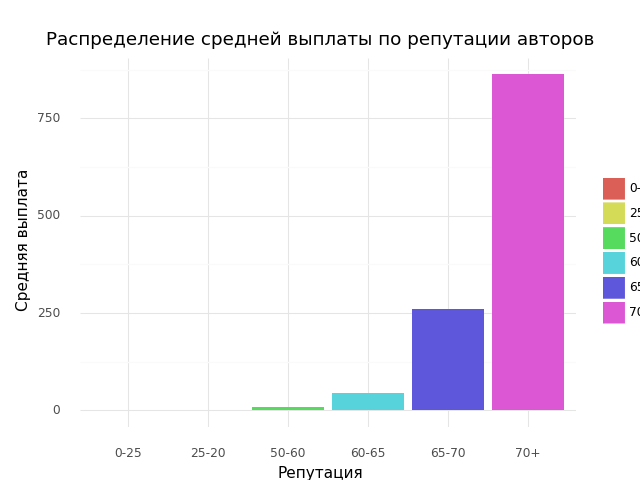

<ggplot: (14014973)>

In [36]:
print(rep_groups_df['total_payout_value'].reset_index())
(ggplot() + geom_bar(aes(y = 'mean', x = 'rep_group', fill = 'rep_group'), data = rep_groups_df['total_payout_value'].reset_index(), stat="identity") +
    theme_minimal() +
    xlab('Репутация') + ylab('Средняя выплата') +  labs(fill='') +
     ggtitle('Распределение средней выплаты по репутации авторов'))

      Категория  Количество постов    Процент
0  Меньше 1 GBG               6903  81.259564
1  Больше 1 GBG               1592  18.740436


<IPython.core.display.Javascript object>


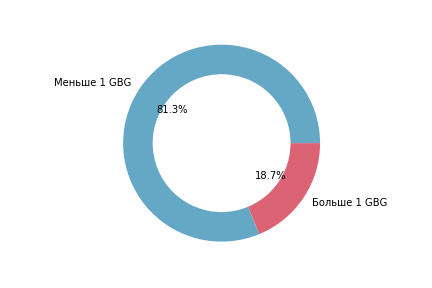

In [37]:
%matplotlib notebook
def perc(row):
    row['Процент'] = row['Количество постов'] * 100 / all_data_df.shape[0]
    return row

lower_than_one = all_data_df.drop(all_data_df[all_data_df.total_payout_value > 1].index)
amount_data = [['Меньше 1 GBG', lower_than_one.shape[0]], ['Больше 1 GBG', all_data_df.shape[0] - lower_than_one.shape[0]]]
amount_df = pd.DataFrame(amount_data, columns=['Категория', 'Количество постов'])
amount_df = amount_df.apply(perc, axis=1)
print(amount_df)

colors = ['#65A8C5', '#DB6374', 'lightskyblue', 'lightcoral', '#B5CCD4']

plt.pie(amount_df['Количество постов'], labels=amount_df['Категория'], colors=colors,
        autopct='%1.1f%%')

centre_circle = plt.Circle((0,0),0.7, fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show() 
plt.savefig("./plots1/01_lower_than_one.png", format="png")

<IPython.core.display.Javascript object>


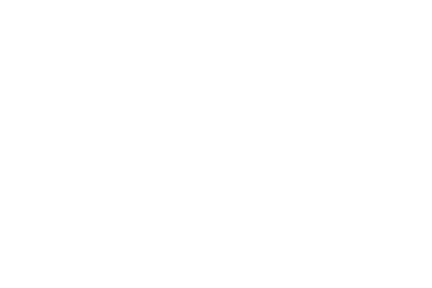

<IPython.core.display.Javascript object>


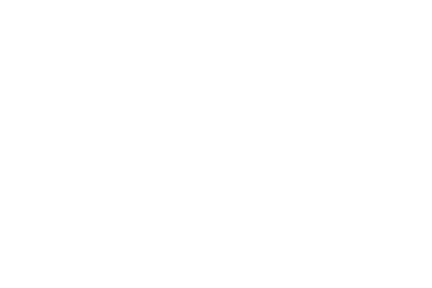

In [53]:
import matplotlib.pyplot as plt
%matplotlib notebook

plt.pie(cat_df['posts_count_cat'], labels=cat_df['cat'], colors=colors)
centre_circle = plt.Circle((0,0),0.65, fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.show()
plt.savefig("./plots2/02_posts_in_cat.svg", format="svg")

<IPython.core.display.Javascript object>


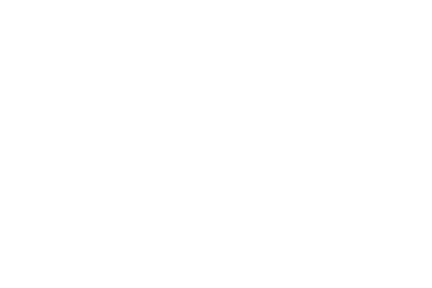

<IPython.core.display.Javascript object>


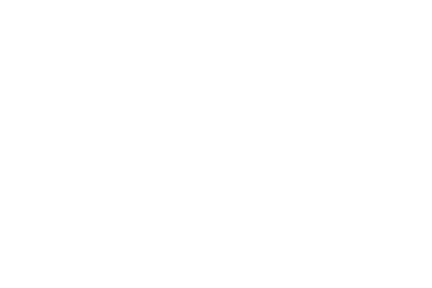

In [52]:
import matplotlib.pyplot as plt
%matplotlib notebook

plt.pie(cat_df['authors_count_cat'], labels=cat_df['cat'], colors=colors)
centre_circle = plt.Circle((0,0),0.65, fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.show()
plt.savefig("./plots2/03_authors_in_cat.svg", format="svg")

<IPython.core.display.Javascript object>


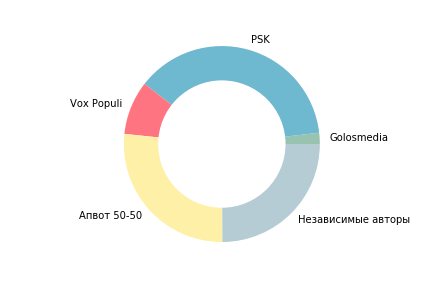

In [54]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.pie(cat_df['sum_payouts_cat'], labels=cat_df['cat'], colors=colors)
centre_circle = plt.Circle((0,0),0.65, fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.show()
plt.savefig("./plots2/04_pays_in_cat.svg", format="svg")

d:\Users\Alexandra\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                  cat  sum_payouts_cat  mean_pay_cat  median_pay_cat  \
4  Независимые авторы       172510.753     24.990693          0.0000   
2          Vox Populi       123487.463    316.634521         81.1715   
3         Апвот 50-50       370541.387    370.171216          0.0260   
0          Golosmedia       108521.840   1619.728955        428.0580   
1                 PSK       387070.435   2888.585336       3259.1115   

   posts_count_cat  authors_count_cat  
4             6903               1707  
2              390                 34  
3             1001                206  
0               67                  8  
1              134                 66  


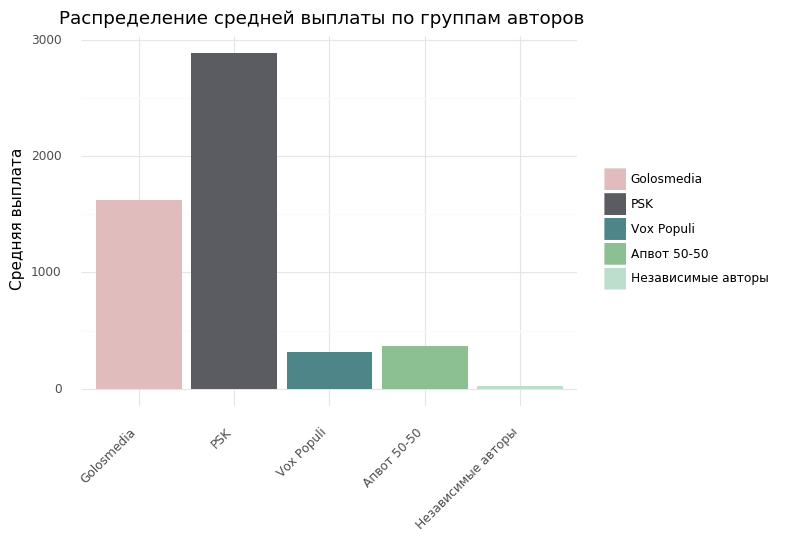

<ggplot: (-9223372036842241364)>

In [7]:
from plotnine import *
%matplotlib inline
sorted_cat_df = cat_df.sort_values('mean_pay_cat')
print(sorted_cat_df)
(ggplot() + geom_bar(aes(y = 'mean_pay_cat', x = 'cat', fill = 'cat'), data = sorted_cat_df, stat="identity") +
    theme_minimal() +
    xlab('') + ylab('Средняя выплата') + 
    ggtitle('Распределение средней выплаты по группам авторов') + labs(fill='') +
    scale_fill_manual(['#E1BCBC', '#5A5C61', '#4D8589', '#8CBF91', '#BDDDCD']) +
    theme(axis_text_x = element_text(angle = 45, hjust = 1)))